In [11]:
os.path.abspath(os.getcwd())

'/home/fabian/BW_codes'

In [28]:
next(os.walk('/home/fabian/artnet_scraping_images'))[1]

['cryptopunks_urls',
 'art_blocks_urls',
 'beeple_everydays_urls',
 'wrapped_cryptopunks_urls',
 'autoglyphs_urls',
 'rarible_urls',
 'superrare_urls',
 'boredapeyachtclub_urls',
 'hashmasks_urls',
 'makersplace_urls']

In [67]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

In [99]:
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import cv2
import glob

In [ ]:
# this list holds all the image filename
path_list = [x[0] for x in os.walk('/home/fabian/artnet_scraping_images')][1:] 
image_list = []
none_list = []

# for each folder in the path
for path in path_list:
    # loops through each file in the directory
    for filepath in glob.glob(f'{path}/*.png'):
        # adds only the image files to the asset_collections list
        img=cv2.imread(filepath)
        filename = filepath.split('/')[-1]
        if img is None:
            none_list.append(filename)
        else:
            image_list.append(filename)
            rl=cv2.resize(img, (100,100))
            cv2.imwrite(f'/home/fabian/img_prep/{filename}', rl)

(-0.5, 696.5, 263.5, -0.5)

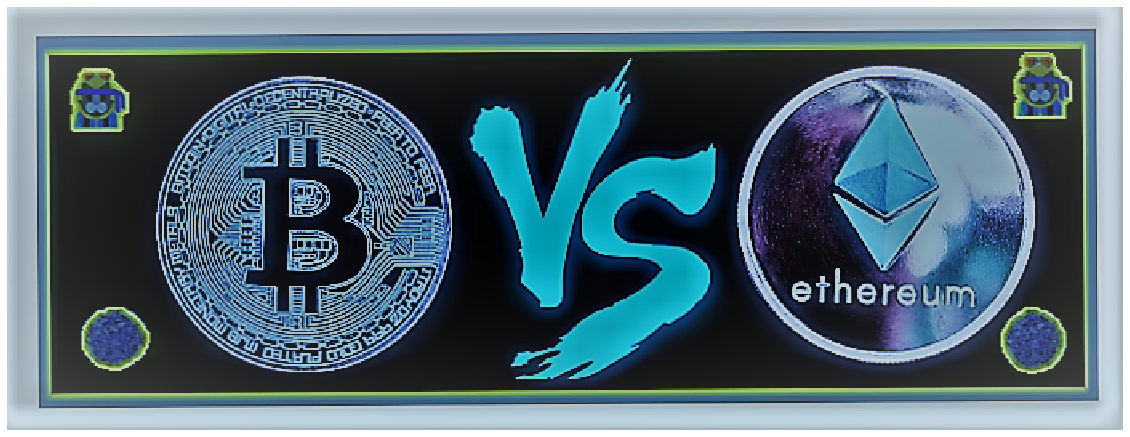

In [113]:
plt.figure(figsize = (20,20))
img_s = load_img('/home/fabian/artnet_scraping_images/rarible_urls/180365.png')
img_s = np.array(img)
plt.imshow(img_s)
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

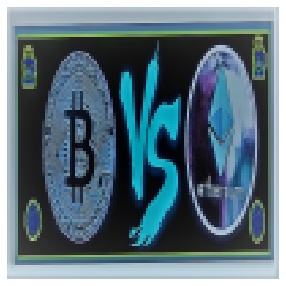

In [116]:
plt.figure(figsize = (5,5))
img_s = load_img('/home/fabian/artnet_scraping_images/rarible_urls/180365.png')
img_s = np.array(rl)
plt.imshow(img_s)
plt.axis('off')

In [168]:
image_df = pd.DataFrame(image_list)
none_df = pd.DataFrame(none_list)

In [169]:
image_df.to_csv('/home/fabian/image_df.csv')
none_df.to_csv('/home/fabian/none_df.csv')